# 1. Importamos las librerias

In [7]:
import pandas as pd
import numpy as np

# 2. Cargamos la data

In [8]:
house = pd.read_csv("houses.csv")

## Información General del Dataset.

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per 10,000
- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in 1000's


In [9]:
house.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. Definimos variable objetivo y caracteristicas

In [12]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
# Variable objetivo es MEDV

y = house['MEDV']

In [14]:
# Las columnas restantes seran las caracterisicas (features)

X = house.drop(['MEDV'],axis=1)

# 4. División de datos para test y entrenamiento.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

#Nuevamente un 70% para entrenamiento y el restantes para prueba. 
#Tambien dejamos un seed para que los resultados sean replicables.

In [16]:
#Vemos como estan distribuidos los datos.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Debido a que los datos se encuentran en escalas distintas seria buena idea normalizar los datos para que estos se encuentren en la misma escala.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Seleccionamos modelo

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 6. entrenamos y ajustamos el modelo

In [19]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
#Obtenemos interceptos.

intercept = model.intercept_
intercept

22.83248587570622

In [21]:
#Obtenemos los coeficientes de las caracteristicas

coef = model.coef_
coef

array([-1.20767891,  0.85995285,  0.1070255 ,  0.63555228, -2.43159195,
        3.08829222,  0.13082323, -3.31025945,  2.22711291, -1.65403572,
       -2.10989321,  0.94408913, -3.91890566])

# 7. Predecimos con el modelo

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
y_pred

array([31.71733828, 22.02143302, 21.16613197, 39.77837246, 20.10258512,
       22.86056216, 18.35574643, 14.7902735 , 22.55778646, 21.34594953,
       18.38491085, 27.9664665 , 29.85929012,  6.44680773, 10.68297311,
       26.24809521, 21.89368671, 25.22692365,  3.62385942, 36.21920372,
       24.07812335, 22.94103934, 14.27095261, 20.79013279, 24.22725035,
       16.7379611 , 18.74856986, 20.96709658, 28.513571  , 20.86346628,
        9.23450577, 17.06754852, 22.06953886, 22.23121875, 39.25875323,
       26.16769924, 42.50354003, 19.34517962, 34.51869058, 14.07023676,
       13.81055358, 23.27727535, 11.79100403,  9.01040731, 21.64587594,
       25.55339317, 18.16941728, 16.81991401, 14.66170215, 14.86477172,
       33.78924259, 33.26959074, 15.49208778, 24.08269034, 27.63531226,
       19.58288727, 45.02488529, 20.96959671, 20.07202649, 27.67146866,
       34.59154418, 12.71353064, 23.66247812, 31.65792337, 28.97459925,
       32.45963484, 13.93494747, 35.491924  , 19.35871482, 19.60

# 8. Vemos la precisión del modelo.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [33]:
mae = mean_absolute_error(y_test,y_pred)
mae

3.155030927602491

In [36]:
mape = mean_absolute_percentage_error(y_test,y_pred)
print(mape)

# Para MAPE, evitamos dividir por cero; agregamos un pequeño número al denominador
# Aqui lo escribimos en base a como esta definido el MAPE
mape1 = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10)))

print(mape1)

0.16355935882217926
0.16355935882112552


In [37]:
mse = mean_squared_error(y_test,y_pred)
mse

20.7180128778385

In [38]:
rmse = np.sqrt(mse)
rmse

4.5517043926246465

In [39]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared



0.6551914852365525

In [40]:
print("MEAN ABSOLUTE ERROR (MAE): ", mae)
print("MEAN SQUARED ERROR (MSE): ", mse)
print("ROOT MEAN SQUARED EROOR (RMSE): ", rmse)
print("MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): ", mape)
print("R-SQUARED: ", r_squared)
print("INTERCEPT: ", intercept)
print("COEF: ", coef)

MEAN ABSOLUTE ERROR (MAE):  3.155030927602491
MEAN SQUARED ERROR (MSE):  20.7180128778385
ROOT MEAN SQUARED EROOR (RMSE):  4.5517043926246465
MEAN ABSOLUTE PERCENTAGE ERROR (MAPE):  0.16355935882217926
R-SQUARED:  0.6551914852365525
INTERCEPT:  22.83248587570622
COEF:  [-1.20767891  0.85995285  0.1070255   0.63555228 -2.43159195  3.08829222
  0.13082323 -3.31025945  2.22711291 -1.65403572 -2.10989321  0.94408913
 -3.91890566]


# 9. Resultados

La ecuación de regresión lineal se define como:

$$
y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n
$$

donde:

- $y$ es la variable dependiente que queremos predecir,
- $\beta_0$ es el intercepto,
- $\beta_i$ son los coeficientes para cada variable independiente $X_i$,
- $X_i$ son las variables independientes.


In [42]:
# Definir los valores para cada característica
CRIM = 0.00632
ZN = 18.0
INDUS = 2.31
CHAS = 0
NX = 0.538
RM = 6.575
AGE = 65.2
DIS = 4.0900
RAD = 1
TAX = 296.0
PTRATIO = 15.3
B = 396.90
LSTAT = 4.98

# Combinar las variables en un array de numpy. 
# El orden de las variables debe de coincidir con el modelo
new_data = np.array([[CRIM, ZN, INDUS, CHAS, NX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]])

# Normalizar los nuevos datos de entrada 
# Utilizando el mismo escalador que se usó para los datos de entrenamiento
new_data_scaled = scaler.transform(new_data)

# Usar el modelo para hacer la predicción con los datos normalizados
new_pred = model.predict(new_data_scaled)

print("La predicción para la nueva entrada es: ", new_pred[0])

La predicción para la nueva entrada es:  30.720681545230537


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 10. Graficar

#### Para graficar la regresión lineal, debemos de tener los datos en dos dimensiones. 

#### Utilizaremos PCA a los datos escalados para reducir dimensionalidad.

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_scaled = scaler.fit_transform(X_test_scaled)
X_train

# Asumiendo X_scaled como tus datos de entrada escalados
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Asumiendo que model es tu modelo de regresión lineal ya entrenado
# Necesitamos predecir los valores de y utilizando los datos originales escalados, no los componentes de PCA
y_pred = model.predict(X_scaled)

y_train_pred


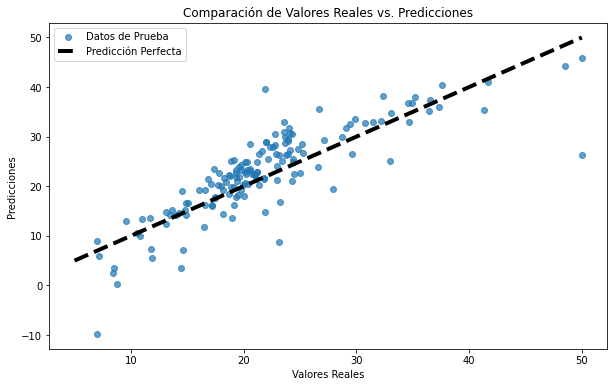

In [56]:
# Generar la gráfica de valores reales vs. predichos

# Configura el tamaño de la figura que contendrá la gráfica.
# Anchi = 10, Alto 6
plt.figure(figsize=(10, 6))

# Creamos gráfico de dispersión con valores reales de prueba (y_test) en el eje x
# Las predicciones del modelo (y_pred) en el eje y 
# alpha lo que hace es que los datos sean ligeramente transparentes.
plt.scatter(y_test, y_pred, alpha=0.7, label='Datos de Prueba')

# Dibuja linea que indicaria donde deberian estar los puntos si predicciones fueran perfectas.
# lw = 4 es el grosor de linea
# 'k--' define que la linea sea punteada
# Los primeros dos parametros son rangos para cada eje.
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.legend()
plt.show()


In [57]:

coefficients = model.coef_

# Calcular la importancia relativa de cada variable en porcentaje
importance = 100 * (abs(coefficients) / abs(coefficients).sum())

# Suponiendo que 'X.columns' contiene los nombres de las variables independientes
variables_importance = pd.DataFrame(importance, index=X.columns, columns=['Importancia (%)'])

# Mostrar la tabla ordenada por importancia
print(variables_importance.sort_values(by='Importancia (%)', ascending=False))


         Importancia (%)
LSTAT          17.320967
DIS            14.630843
RM             13.649782
NX             10.747267
RAD             9.843500
PTRATIO         9.325407
TAX             7.310586
CRIM            5.337757
B               4.172730
ZN              3.800861
CHAS            2.809044
AGE             0.578219
INDUS           0.473036


### Aqui entra en juego la parte de ir iterando para mejorar la caldidad del modelo (ajuste de modelo)...